<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Seems to need 
#%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

import utils.directories as ds

In [7]:
# TODO: convert files to UTF-8?
geo = pd.read_csv(ds.interim_path("nodes_geo.csv.bz2"),
                  encoding='latin-1',
                  engine='c',
                  dtype={'nid': str,
                         'lat': np.float64,
                         'lon': np.float64})

In [4]:
geo.head()

,nid,lat,lon
0,N1,1.2931,103.8558
1,N2,6.2518,-75.5636
2,N3,48.8582,2.3387
3,N4,48.8582,2.3387
4,N5,-22.8305,-43.2192


<IPython.core.display.Javascript object>


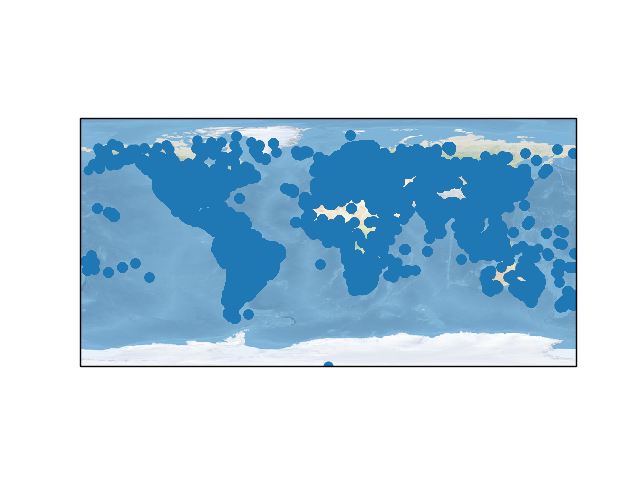

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.plot(geo.lon, geo.lat,'o')
plt.show()

Geographical coverage is very good. Are cliques more localized?

In [2]:
cliques = pd.read_csv(ds.interim_path('cliques.csv.bz2'),
                      encoding='latin-1',
                      engine='c',
                      dtype={'ip_lid': str,
                             'nid':str},
                      skiprows=lambda x: x > 1000)
cliques.head()

,ip_lid,nid
0,L1,N18944591
1,L1,N126698
2,L2,N18944592
3,L2,N126700
4,L2,N126701


In [6]:
cliques.groupby('ip_lid').count().sort_values(by='nid', ascending=False).head()

,nid
ip_lid,
L292,54
L49,54
L271,47
L48,33
L302,30


In [14]:
to_plot = cliques.query('ip_lid == "L49"').merge(geo, on='nid', how='left')
to_plot.head()

,ip_lid,nid,lat,lon
0,L49,N126803,-37.7,145.1833
1,L49,N126746,NaN,NaN
2,L49,N126747,NaN,NaN
3,L49,N126748,NaN,NaN
4,L49,N126749,NaN,NaN


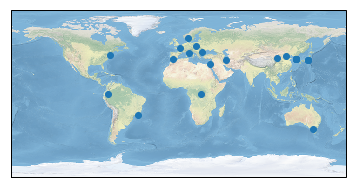

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.plot(to_plot.lon, to_plot.lat,'o')
plt.show()
del ax